In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

In [4]:
movies_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ml-latest-small/movies.csv", index_col='movieId', encoding='utf-8')
ratings_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ml-latest-small/ratings.csv', encoding='utf-8')
tags_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ml-latest-small/tags.csv', encoding='utf-8')

### 데이터확인


In [6]:
movies_df.head()

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [7]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [8]:
tags_df.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


### movies.csv 장르 확인

In [10]:
all_genres = [x.split('|') for x in movies_df['genres'].values] 
all_genres[:5]

[['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy'],
 ['Adventure', 'Children', 'Fantasy'],
 ['Comedy', 'Romance'],
 ['Comedy', 'Drama', 'Romance'],
 ['Comedy']]

### 유니크한 장르의 갯수 확인

In [11]:
import itertools
genres = list(set(list(itertools.chain(*all_genres)))) 
print(len(genres))     
print(genres)

20
['Action', 'Romance', 'Children', 'Horror', 'IMAX', 'Crime', 'Drama', 'Sci-Fi', 'Fantasy', 'Comedy', 'Thriller', 'Mystery', 'Animation', 'Musical', 'Documentary', 'War', 'Adventure', '(no genres listed)', 'Film-Noir', 'Western']


In [12]:
genres_df = movies_df['genres'].str.get_dummies(sep='|')
genres_df.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### rating.csv의 평균과 표준편차 확인

In [13]:
print('평점의 평균: ', ratings_df['rating'].mean().round(4))
print('평점의 표준편차: ', ratings_df['rating'].std().round(4))

평점의 평균:  3.5016
평점의 표준편차:  1.0425


###빈도확인

<Axes: >

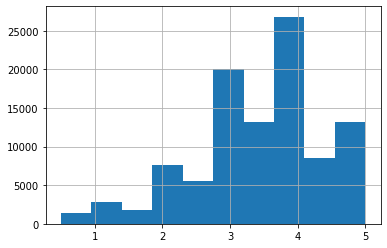

In [14]:
ratings_df.rating.hist()